In [111]:
from sklearn import datasets
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#get data
iris = datasets.load_iris()

iris_y = iris.target

#different hyperparam
xgbc1 = xgb.XGBClassifier(n_estimators = 5, verbosity = 0)
xgbc10 = xgb.XGBClassifier(n_estimators = 30, verbosity = 0)
xgbc_gpu = xgb.XGBClassifier(n_estimators = 30, verbosity = 0, tree_method = "gpu_hist")
xgbc_100 = xgb.XGBClassifier(n_estimators = 100, verbosity = 0)
print(xgbc_gpu)

 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', validate_parameters=None, verbosity=0)


In [112]:
#shape (150,1)
iris_x = iris.data[:,:1]
xtrain,xtest, ytrain,ytest = train_test_split(iris_x,iris_y, test_size = 0.15)
time15 = %timeit -o xgbc1.fit(xtrain,ytrain)
time130 = %timeit -o xgbc10.fit(xtrain,ytrain)
#time1_gpu = %timeit xgbc_gpu.fit(xtrain,ytrain)
time1_100= %timeit -o xgbc_100.fit(xtrain,ytrain)





/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


274 ms ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.36 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.58 s ± 1.49 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [113]:
#shape (150,2)
iris_x = iris.data[:,:2]
xtrain,xtest, ytrain,ytest =train_test_split(iris_x,iris_y, test_size = 0.15)
time25 = %timeit -o xgbc1.fit(xtrain,ytrain)
time230 = %timeit -o xgbc10.fit(xtrain,ytrain)
#time2_gpu = %timeit xgbc_gpu.fit(xtrain,ytrain)
time2_100 = %timeit -o xgbc_100.fit(xtrain,ytrain)

407 ms ± 168 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.06 s ± 65.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.04 s ± 1.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
#shape (150,3)
iris_x = iris.data[:,:3]
xtrain,xtest, ytrain,ytest =train_test_split(iris_x,iris_y, test_size = 0.15)
time35 = %timeit -o xgbc1.fit(xtrain,ytrain)
time330 = %timeit -o xgbc10.fit(xtrain,ytrain)
#time3_gpu = %timeit xgbc_gpu.fit(xtrain,ytrain)
time3_100= %timeit -o xgbc_100.fit(xtrain,ytrain)

260 ms ± 84.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
815 ms ± 76.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.26 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


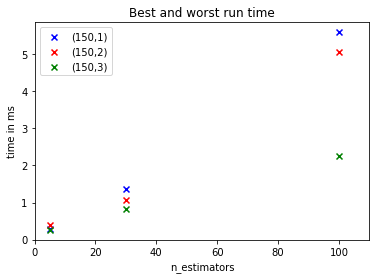

In [115]:
y1 = [sum(time15.all_runs)/len(time15.all_runs)/10, sum(time130.all_runs)/len(time130.all_runs), sum(time1_100.all_runs)/len(time1_100.all_runs)]
y2 = [sum(time25.all_runs)/len(time25.all_runs)/10, sum(time230.all_runs)/len(time230.all_runs), sum(time2_100.all_runs)/len(time2_100.all_runs)]
y3 = [sum(time35.all_runs)/len(time35.all_runs)/10, sum(time330.all_runs)/len(time330.all_runs), sum(time3_100.all_runs)/len(time3_100.all_runs)]


plt.scatter([5,30,100],y1, label = "(150,1)", c = "blue", marker="x")
plt.scatter([5,30,100],y2, label = "(150,2)", c = "red", marker="x")
plt.scatter([5,30,100],y3, label = "(150,3)", c = "green", marker="x")


plt.title("Best and worst run time")
plt.xlabel("n_estimators")
plt.ylabel("time in ms")
plt.xlim([0,110])
plt.legend()


In [116]:
d = {"n=5": [y1[0], y2[0], y3[0]], "n=30": [y1[1], y2[1], y3[1]], "n=100": [y1[2], y2[2], y3[2]]}
df = pd.DataFrame(d, index = pd.Index(["(150,1)","(150,2)","(150,3)"]))
print("runtime in s for different n_estimators and data size:")
df

runtime in s for different n_estimators and data size:


,n=5,n=30,n=100
"(150,1)",0.274397,1.356312,5.584503
"(150,2)",0.407036,1.056327,5.043253
"(150,3)",0.260006,0.815030,2.257649
